### Importer les packages

In [1]:
import pyforest
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

### Importer les données

In [2]:
agriculture_data = pd.read_csv('data/agriculture_data.csv')
urbanization_data = pd.read_csv('data/urbanization_data.csv')
forest_data = pd.read_csv('data/forest_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
agriculture_data.head()

,Année,Region,Superficie_Sorgho,Superficie_Arachide,Superficie_Mais,Superficie_Manioc,Superficie_Coton,Superficie_Mil,Superficie_Niebe,Superficie_Riz,Somme_Superficie
0,2001,DAKAR,801.000000,90,84.0,541.0,0.0,48.5,201.0,0.0,1765.500000
1,2002,DAKAR,247.133333,82,80.0,61.0,0.0,165.0,270.0,0.0,905.133333
2,2003,DAKAR,247.133333,145,510.0,101.0,0.0,22.0,154.0,0.0,1179.133333
3,2004,DAKAR,198.000000,84,250.0,178.0,0.0,37.0,410.0,0.0,1157.000000
4,2005,DAKAR,68.000000,775,600.0,665.0,0.0,10.0,1102.0,0.0,3220.000000


### Concaténer les données et renommer les colonnes 

In [26]:
Data = pd.concat([urbanization_data, agriculture_data[['Somme_Superficie']],
                  forest_data.drop(['Date'], axis = 1) ], axis = 1)
Data.columns = ['Region', 'Date', "Taux d'urbainisation", 'Superficie agricole', 'Superficie perdue', 'Risque déforestation']

<IPython.core.display.Javascript object>

In [27]:
Data.head()

,Region,Date,Taux d'urbainisation,Superficie agricole,Superficie perdue,Risque déforestation
0,Dakar,2001,96.63,1765.50,3.71,1
1,Dakar,2002,96.69,905.13,0.07,1
2,Dakar,2003,96.59,1179.13,3.71,1
3,Dakar,2004,96.69,1157.00,0.07,1
4,Dakar,2005,96.69,3220.00,3.71,1


### Exploration des données 

In [6]:
pd.set_option("display.float", "{:.2f}".format)
Data.describe()

<IPython.core.display.Javascript object>

,Date,Taux d'urbainisation,Superficie agricole,Superficie perdue,Risque déforestation
count,280.00,280.00,280.00,280.00,280.00
mean,2010.50,30.46,183440.35,490.56,0.43
std,5.78,21.53,130382.55,1288.43,0.50
min,2001.00,11.94,905.13,0.07,0.00
25%,2005.75,16.47,61331.00,0.94,0.00
50%,2010.50,22.16,184709.75,9.23,0.00
75%,2015.25,41.46,272795.62,383.03,1.00
max,2020.00,97.22,543523.00,12172.03,1.00


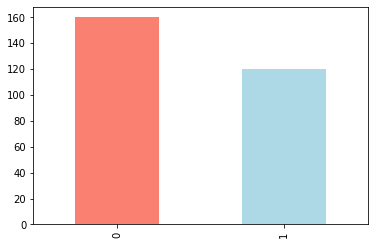

In [7]:
Data['Risque déforestation'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [8]:
Data.isna().sum()

Region                  0
Date                    0
Taux d'urbainisation    0
Superficie agricole     0
Superficie perdue       0
Risque déforestation    0
dtype: int64

##### Sélection des variables continues 

In [9]:
Data = Data.drop(['Region', 'Date'], axis= 1 ) 
Data.head()

,Taux d'urbainisation,Superficie agricole,Superficie perdue,Risque déforestation
0,96.63,1765.50,3.71,1
1,96.69,905.13,0.07,1
2,96.59,1179.13,3.71,1
3,96.69,1157.00,0.07,1
4,96.69,3220.00,3.71,1


### Matrice de corrélation 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(4.5, -0.5)

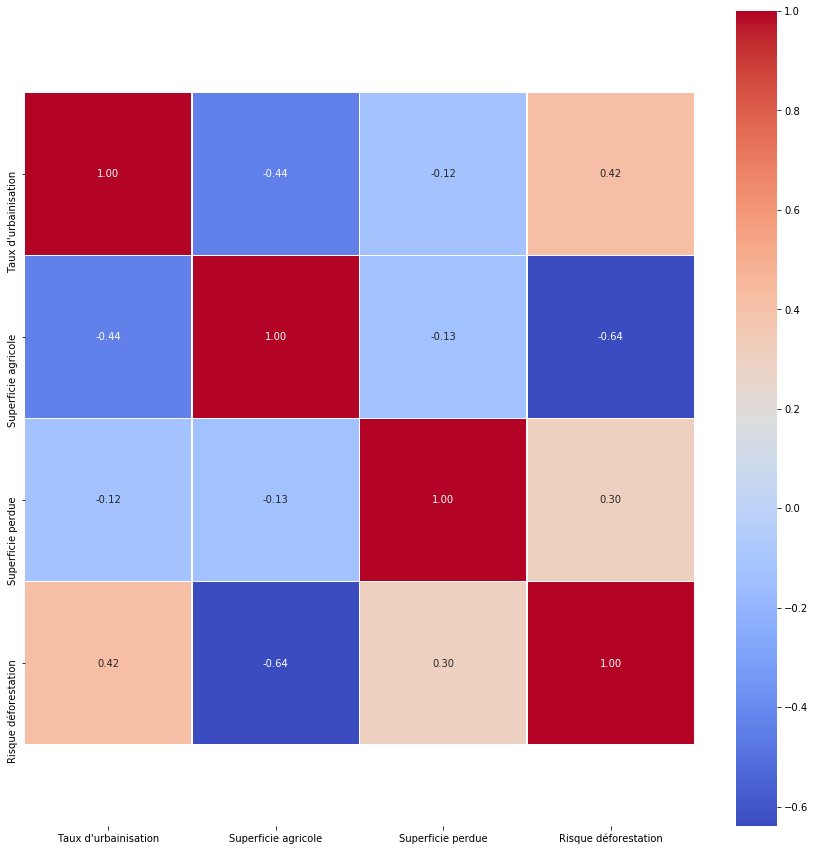

In [10]:
# Let's make our correlation matrix a little prettier
corr_matrix = Data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="coolwarm");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

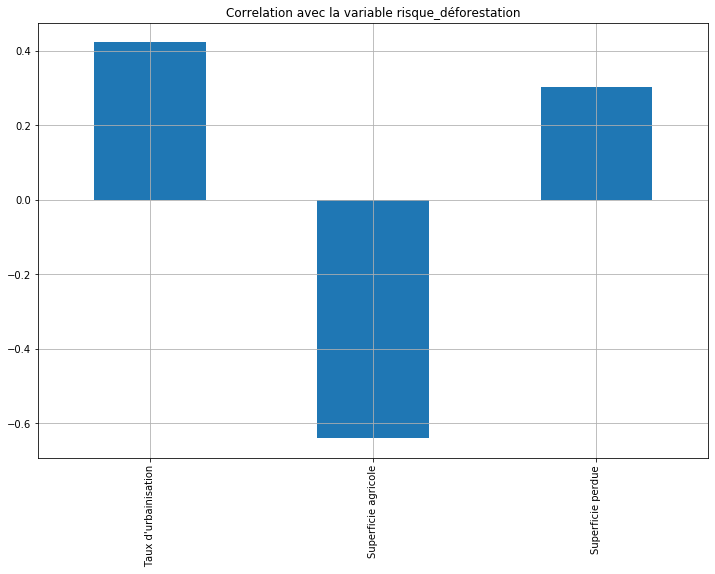

In [11]:
Data.drop('Risque déforestation', axis=1).corrwith(Data['Risque déforestation']).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation avec la variable risque_déforestation")

##### Commentaires

- On voit les variables 'Superficie agricole' et 'Taux d'urbanisation' sont plus correlées avec la variable 'risque_déforestation' que la variable 'Superficie perdue'. 

### Transformation des données 

In [12]:
X = Data.drop(['Risque déforestation'], axis  = 1 ) 
y = Data['Risque déforestation']

In [13]:
# from sklearn.preprocessing import StandardScaler
# s_sc = StandardScaler()
# X = s_sc.fit_transform(X)

### Fractionner les données 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

### Application de la méthode RandomForest sur les données

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
#         clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
#         clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Trouver les paramètres optimaux

In [16]:
rfc =RandomForestClassifier(random_state=42)

<IPython.core.display.Javascript object>

In [17]:
param_grid = { 
    'n_estimators': [100, 200,300,400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [18]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 4)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [19]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 300}

##### Application du modèle avec les paramètres optimaux obtenus

In [20]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, 
                            max_depth=4, criterion='entropy')
rfc1.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
print_score(rfc1, X_train, y_train, X_test, y_test, train=True)
print_score(rfc1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.98%
_______________________________________________
Confusion Matrix: 
 [[114   2]
 [  0  80]]

Test Result:
Accuracy Score: 91.67%
_______________________________________________
Confusion Matrix: 
 [[39  5]
 [ 2 38]]



##### Prédiction

In [22]:
def Prédiction(Value): 
    if Value == [1]: 
        print('PREDICTION : \n La région est fortement menacée par la déforestation')
    else:
        print('PREDICTION : \n La région est faiblement menacée par la déforestation')

In [23]:
Value = rfc1.predict([[96.69, 220.00, 3.71]])
Prédiction(Value)

PREDICTION : 
 La région est fortement menacée par la déforestation
